In [39]:
## Imports 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
df_penguins=pd.read_csv("penguins.csv")

# Preprocess the data (handle missing values)
df_penguins.dropna(inplace=True)

# Encoding species into numerical value
le = LabelEncoder()
df_penguins.species = le.fit_transform(df_penguins.species)
df_penguins.species.unique()

array([0, 2, 1])

In [136]:
# Encoding categorical vairables 
df1 = pd.get_dummies(df_penguins[['island', 'sex']],
                    prefix = ['island', 'sex'] )
df2 = pd.concat([df_penguins, df1], axis=1)
df2.drop(['island', 'sex','rowid'], axis = 1, inplace = True)
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,False,False,True,False,True
1,0,39.5,17.4,186.0,3800.0,2007,False,False,True,True,False
2,0,40.3,18.0,195.0,3250.0,2007,False,False,True,True,False
4,0,36.7,19.3,193.0,3450.0,2007,False,False,True,True,False
5,0,39.3,20.6,190.0,3650.0,2007,False,False,True,False,True


In [137]:
# Defining the x and y variables
X = df2.drop('species', axis= 1)
y = df2['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 100) 
# Initalization of the decisiontreeclassifier
dtc = DecisionTreeClassifier()
# fitting on model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

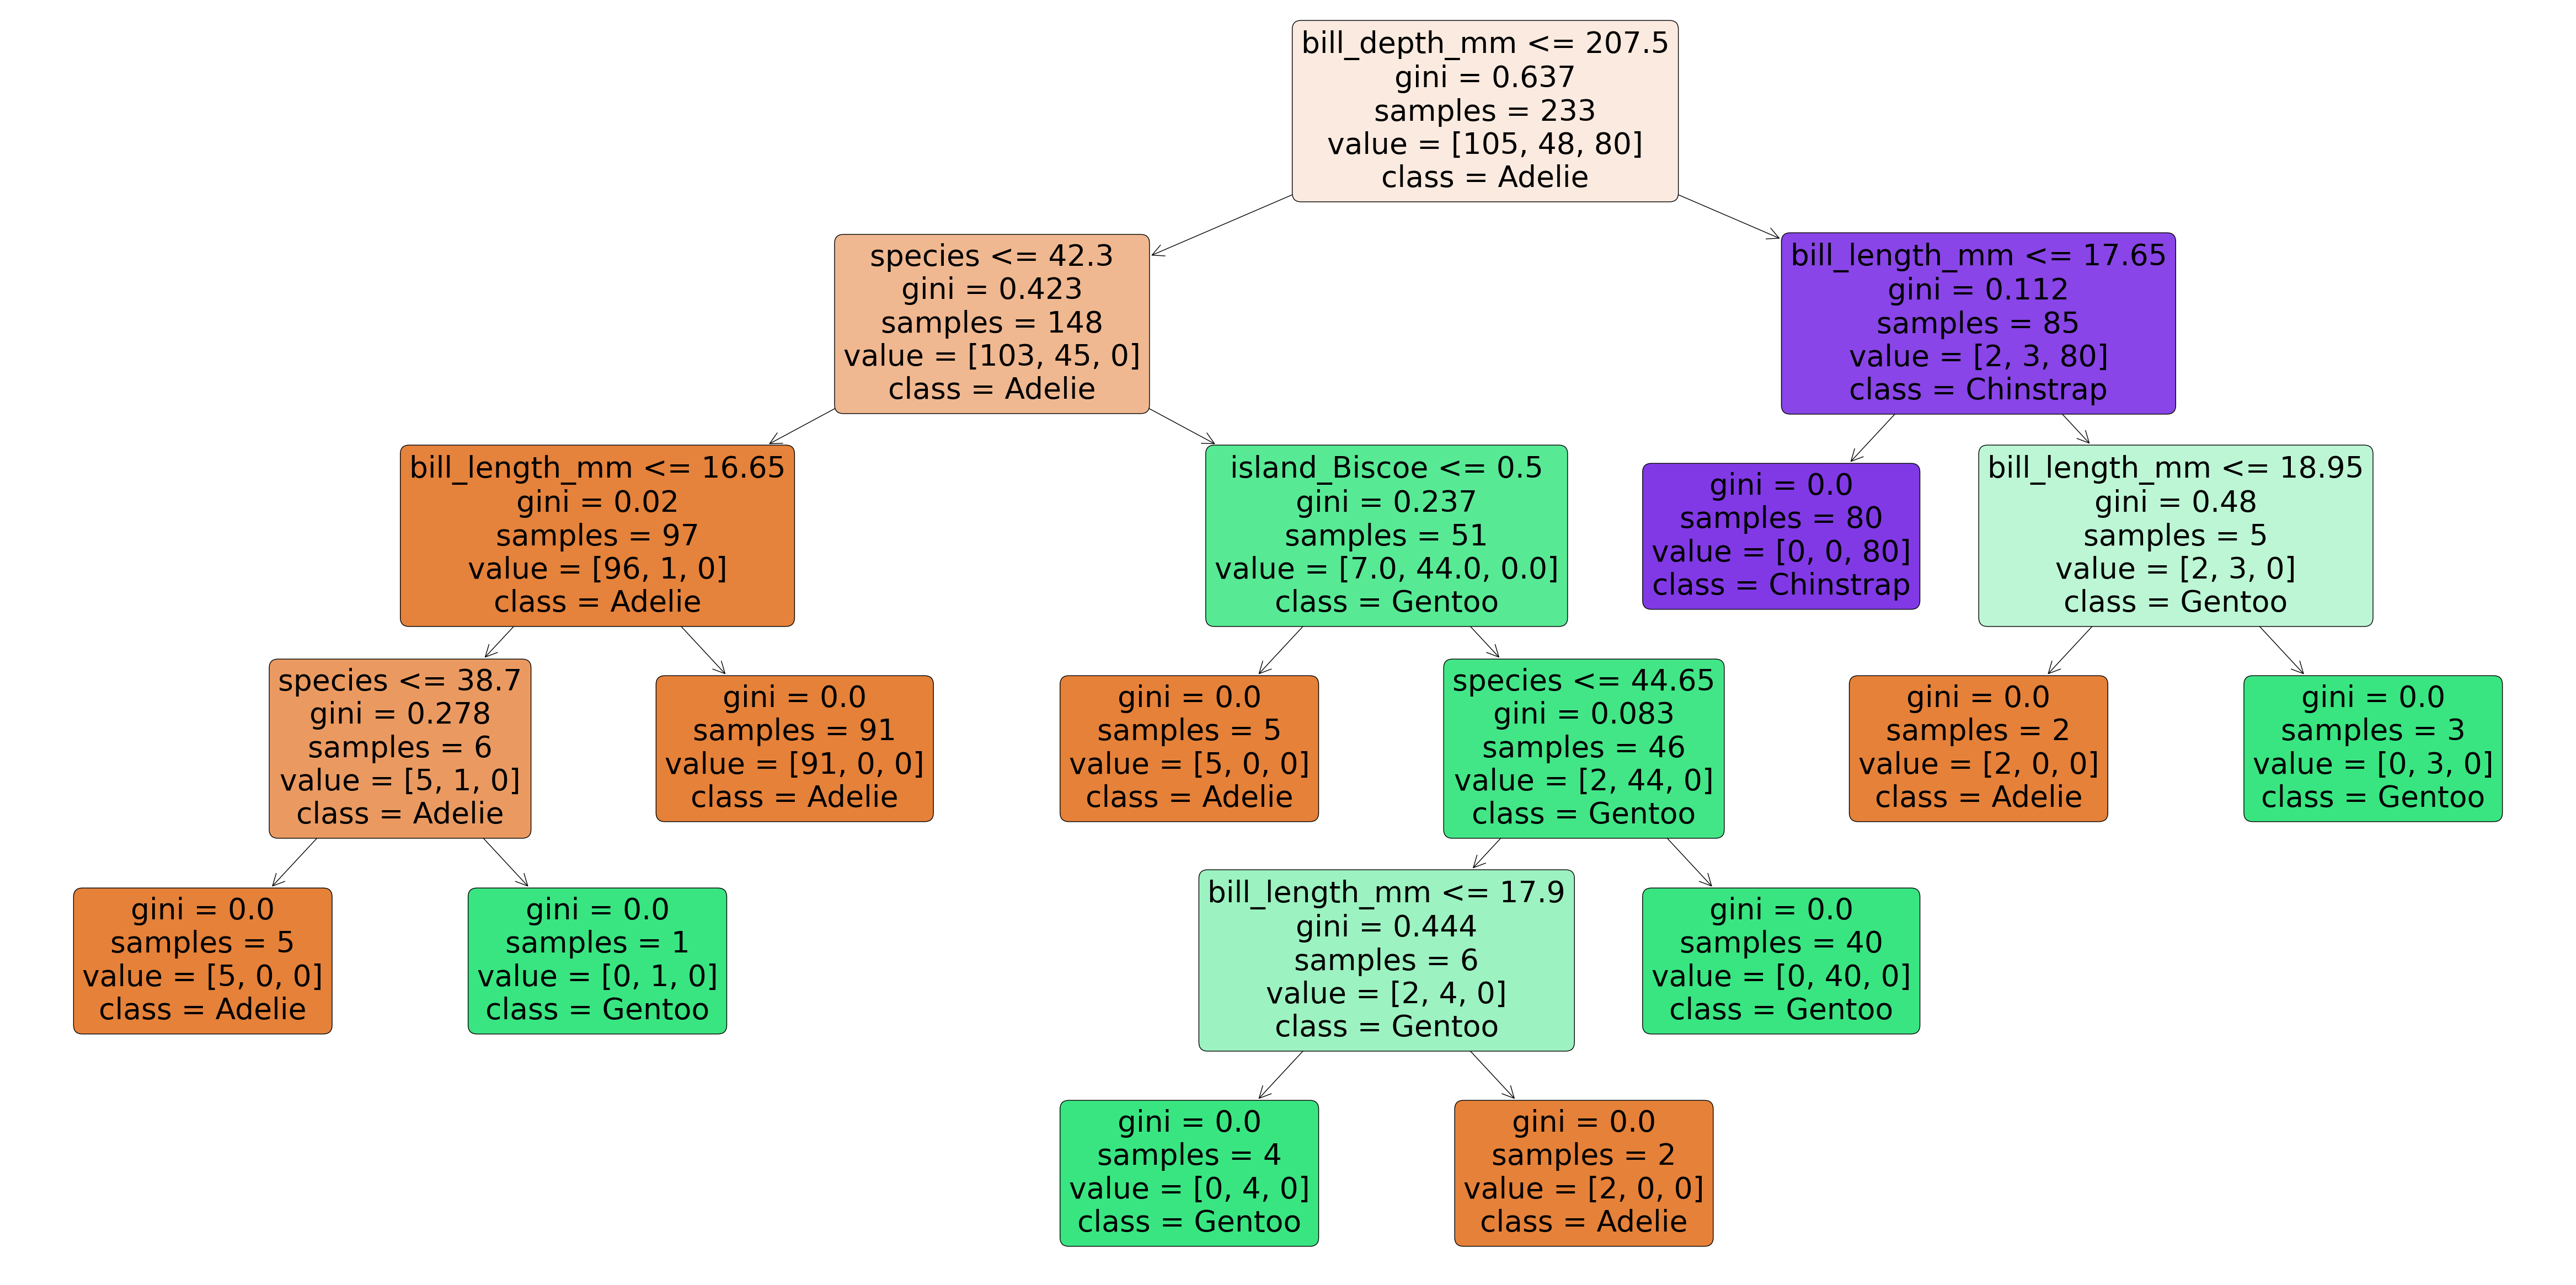

In [138]:
# Building initial model
plt.figure(figsize=(60, 30))
plot_tree(dtc, feature_names= df2.columns, class_names= ['Adelie','Gentoo','Chinstrap'], filled= True, rounded = True )
plt.show()

In [139]:
# Model prediction
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# checking accuracy on train data

print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[105,   0,   0],
       [  0,  48,   0],
       [  0,   0,  80]], dtype=int64)

In [140]:
# checking accuracy on test data
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.97


array([[41,  0,  0],
       [ 1, 19,  0],
       [ 2,  0, 37]], dtype=int64)

In [141]:
# HYPERPARAMETER TUNING
dt = DecisionTreeClassifier(random_state=100)
# Defining hyperparameters
params = {
    'max_depth': [3,5],
    'min_samples_leaf': [5,10,15,20],
    'criterion': ['gini', 'entropy']   
}

# creating model through GridSearchCV
grid_search= GridSearchCV(estimator= dt, param_grid = params, cv= 4, n_jobs=-1, verbose=1, scoring= 'accuracy')

# model fitting
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [142]:
# Creating the dataframe with result
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.shape
# Best parameters
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [143]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}

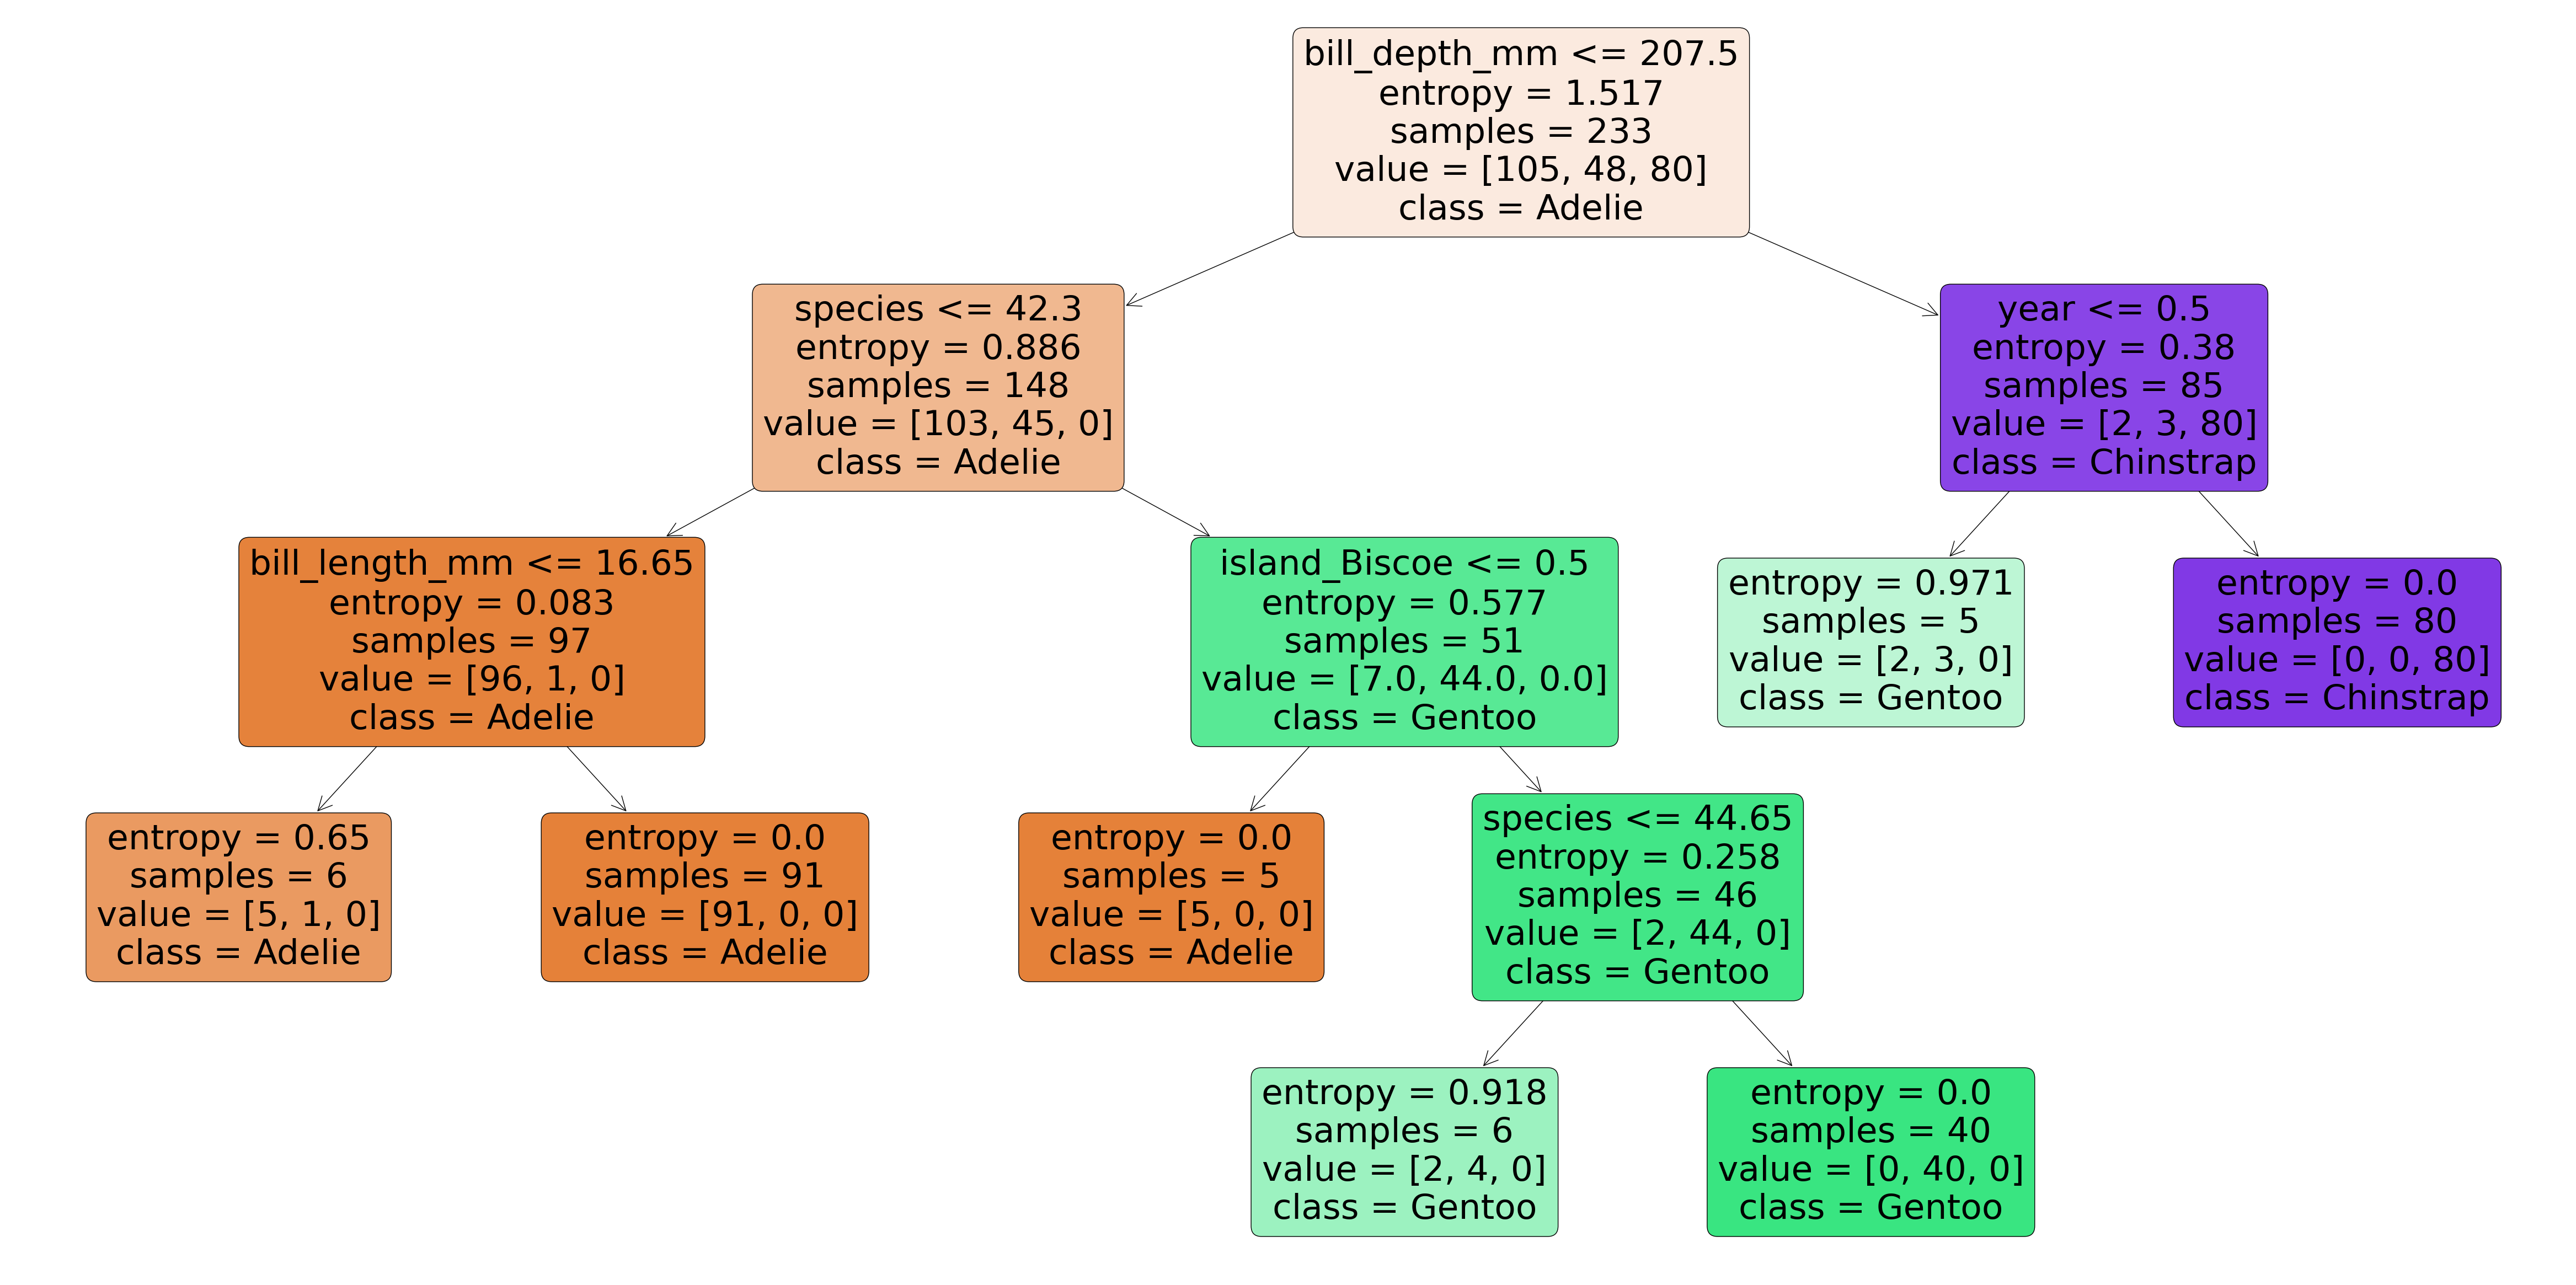

In [144]:
# Taking out the best parameters and build best tree
dt_best = grid_search.best_estimator_
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names= df2.columns, class_names= ['Adelie','Gentoo','Chinstrap'], filled= True, rounded = True)
plt.show()

In [145]:
# Checking for the accuracy score
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)
accuracytr= accuracy_score(y_train, y_train_pred)
accuracytest = accuracy_score(y_test, y_test_pred)
print(f"Train Performance={accuracytr}, Test performance = {accuracytest}")

Train Performance=0.9785407725321889, Test performance = 0.98
